<a href="https://colab.research.google.com/github/NerusuSahithi011/NLP/blob/main/lab_assignment09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Used to load pre-trained Word2Vec / GloVe models
import gensim
from gensim.models import KeyedVectors

# Used for numerical operations and vector calculations
import numpy as np

# Used for organizing similarity results in table format
import pandas as pd

# Used for optional preprocessing (tokenization, etc.)
import nltk

# Used for visualization
import matplotlib.pyplot as plt

# Used for dimensionality reduction (PCA)
from sklearn.decomposition import PCA


In [10]:
import gensim.downloader as api
from gensim.models import KeyedVectors

# Load pre-trained Word2Vec model using gensim.downloader
# This will handle downloading and loading the model automatically.
model = api.load("word2vec-google-news-300")

# Print vocabulary size
print("Model Loaded Successfully!\n")
print("Vocabulary Size:", len(model.key_to_index))

# Display vector for a sample word
print("Vector for 'king':")
print(model['king'])

Model Loaded Successfully!

Vocabulary Size: 3000000
Vector for 'king':
[ 1.25976562e-01  2.97851562e-02  8.60595703e-03  1.39648438e-01
 -2.56347656e-02 -3.61328125e-02  1.11816406e-01 -1.98242188e-01
  5.12695312e-02  3.63281250e-01 -2.42187500e-01 -3.02734375e-01
 -1.77734375e-01 -2.49023438e-02 -1.67968750e-01 -1.69921875e-01
  3.46679688e-02  5.21850586e-03  4.63867188e-02  1.28906250e-01
  1.36718750e-01  1.12792969e-01  5.95703125e-02  1.36718750e-01
  1.01074219e-01 -1.76757812e-01 -2.51953125e-01  5.98144531e-02
  3.41796875e-01 -3.11279297e-02  1.04492188e-01  6.17675781e-02
  1.24511719e-01  4.00390625e-01 -3.22265625e-01  8.39843750e-02
  3.90625000e-02  5.85937500e-03  7.03125000e-02  1.72851562e-01
  1.38671875e-01 -2.31445312e-01  2.83203125e-01  1.42578125e-01
  3.41796875e-01 -2.39257812e-02 -1.09863281e-01  3.32031250e-02
 -5.46875000e-02  1.53198242e-02 -1.62109375e-01  1.58203125e-01
 -2.59765625e-01  2.01416016e-02 -1.63085938e-01  1.35803223e-03
 -1.44531250e-01 -

In [11]:
pairs = [
    ('doctor', 'nurse'),
    ('cat', 'dog'),
    ('car', 'bus'),
    ('king', 'queen'),
    ('teacher', 'student'),
    ('apple', 'banana'),
    ('paris', 'france'),
    ('table', 'sun'),
    ('computer', 'laptop'),
    ('river', 'ocean')
]

for w1, w2 in pairs:
    similarity = model.similarity(w1, w2)
    print(f"{w1} - {w2} : {similarity:.4f}")


doctor - nurse : 0.6320
cat - dog : 0.7609
car - bus : 0.4693
king - queen : 0.6511
teacher - student : 0.6301
apple - banana : 0.5318
paris - france : 0.5551
table - sun : 0.0768
computer - laptop : 0.6640
river - ocean : 0.4772


In [12]:
words = ['king', 'university', 'india', 'money', 'computer']

for word in words:
    print(f"\nTop similar words for {word}:")
    print(model.most_similar(word, topn=5))



Top similar words for king:
[('kings', 0.7138045430183411), ('queen', 0.6510956883430481), ('monarch', 0.6413194537162781), ('crown_prince', 0.6204220056533813), ('prince', 0.6159993410110474)]

Top similar words for university:
[('universities', 0.7003918886184692), ('faculty', 0.6780907511711121), ('unversity', 0.6758289933204651), ('undergraduate', 0.6587094664573669), ('univeristy', 0.6585438251495361)]

Top similar words for india:
[('indian', 0.6967039704322815), ('usa', 0.6836211085319519), ('pakistan', 0.681516706943512), ('chennai', 0.6675503253936768), ('america', 0.6589399576187134)]

Top similar words for money:
[('monies', 0.7165061831474304), ('funds', 0.7055202722549438), ('moneys', 0.6289054751396179), ('dollars', 0.628852367401123), ('cash', 0.6151221394538879)]

Top similar words for computer:
[('computers', 0.7979379892349243), ('laptop', 0.6640493273735046), ('laptop_computer', 0.6548868417739868), ('Computer', 0.647333562374115), ('com_puter', 0.6082080006599426)]

In [13]:
# king - man + woman
print(model.most_similar(positive=['king', 'woman'], negative=['man'], topn=1))

# paris - france + india
print(model.most_similar(positive=['paris', 'india'], negative=['france'], topn=1))

# teacher - school + hospital
print(model.most_similar(positive=['teacher', 'hospital'], negative=['school'], topn=1))


[('queen', 0.7118193507194519)]
[('chennai', 0.5442505478858948)]
[('Hospital', 0.6331106424331665)]


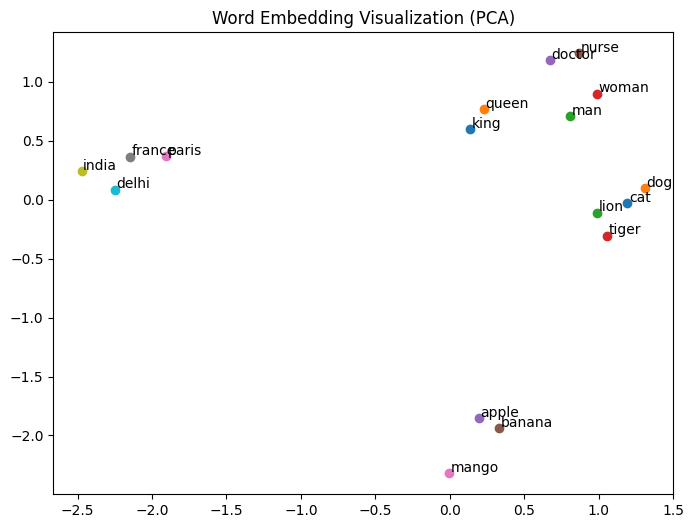

In [15]:
words = ['king','queen','man','woman','doctor','nurse',
         'paris','france','india','delhi',
         'cat','dog','lion','tiger',
         'apple','banana','mango']

vectors = [model[word] for word in words]

pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

plt.figure(figsize=(8,6))
for i, word in enumerate(words):
    plt.scatter(reduced[i,0], reduced[i,1])
    plt.text(reduced[i,0]+0.01, reduced[i,1]+0.01, word)

plt.title("Word Embedding Visualization (PCA)")
plt.show()
